In [244]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### MeanShift

In [245]:

framesPaths = {
    "Dog":"./Dog/img/{:04d}.jpg", #http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Dog.zip
    "BlurBody":"./BlurBody/img/{:04d}.jpg", #http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/BlurBody.zip
    "Bird1":"./Bird1/img/{:04d}.jpg", #http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Bird1.zip
    "David":"./David/img/{:04d}.jpg", #http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/David.zip
    "MotorRolling":"./MotorRolling/img/{:04d}.jpg" #http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/MotorRolling.zip
}

framesAmounts = {
    "Dog":127,
    "BlurBody": 334,
    "Bird1":408,
    "David":770,
    "MotorRolling":164
}

initTrackWindows = {
    "Dog":(30,60,125,120), # left top point, width and height of rect
    "BlurBody":(375,45,120,320),
    "Bird1": (390,50,140,80),
    "David": (135,40,110,120),
    "Biker": (235,90,70,170),
    "MotorRolling": (110,60,140,140)
}

isDatasetInColor = {
    "Dog":True,
    "BlurBody": True,
    "Bird1":True,
    "David":True,
    "Biker":True,
    "MotorRolling": True
}

areHSVRequired = {
    "Dog":True,
    "BlurBody": False,
    "Bird1":False,
    "David":False,
    "MotorRolling": True
    
}

areMaskRequired = {
    "Dog":True,#
    "BlurBody": False, #
    "Bird1":False, #
    "David":False, #
    "MotorRolling": True #
    
}


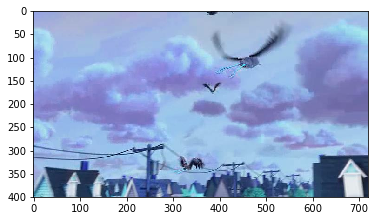

In [246]:
#here change dataset and everything would change
currDataset = "Bird1"

#first img Url
frames_path = framesPaths[currDataset]
init_img_path = frames_path.format(1)

# take first frame of the video
frame = cv.imread(init_img_path)
plt.imshow(frame)

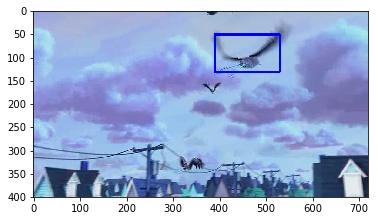

In [247]:
# setup initial location of window
track_window = initTrackWindows[currDataset]
(x1, y1, w, h) = track_window
img_rect = cv.rectangle(frame.copy(), (x1,y1), (x1 + w,y1 + h), (0,0,255), 4)

plt.imshow(img_rect)

In [248]:
isColorDataset = isDatasetInColor[currDataset]
isMaskReq = areMaskRequired[currDataset]
is_hsv_req = areHSVRequired[currDataset]

# set up the ROI for tracking
roi = frame[y1:y1+h, x1:x1+w]
m_range = 255
if isColorDataset:
    roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
    m_range = 180
    
mask = None
if isMaskReq:
    mask = cv.inRange(roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
    
roi_hist = cv.calcHist([roi],[0], mask, [m_range], [0, m_range - 1])
cv.normalize(roi_hist,roi_hist, 0, m_range, cv.NORM_MINMAX)


array([[7.7983463e-01],
       [4.9625838e-01],
       [9.2162269e-01],
       [2.1977158e+00],
       [2.8357623e+00],
       [1.0917685e+01],
       [1.0775896e+01],
       [1.8219772e+01],
       [2.9350140e+01],
       [2.9208351e+01],
       [3.9984245e+01],
       [7.6423790e+01],
       [7.9684921e+01],
       [1.8000000e+02],
       [1.7276881e+02],
       [7.4509651e+01],
       [4.1118553e+01],
       [1.0775896e+01],
       [2.8357623e+00],
       [1.8432454e+00],
       [1.1343049e+00],
       [1.4887751e+00],
       [1.1343049e+00],
       [7.7983463e-01],
       [8.5072863e-01],
       [7.7983463e-01],
       [2.8357622e-01],
       [3.5447028e-01],
       [7.0894055e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.000000

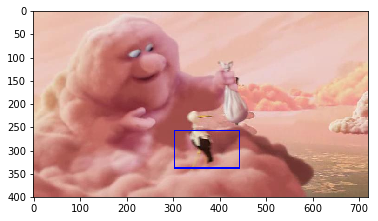

In [249]:
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
frames_amount = framesAmounts[currDataset]
for i in range(1, frames_amount):
    frame_url = frames_path.format(i)
    curr_frame = cv.imread(frame_url)
    if is_hsv_req:
        curr_frame = cv.cvtColor(curr_frame, cv.COLOR_BGR2HSV)
    
    dst = cv.calcBackProject([curr_frame],[0],roi_hist,[0,m_range],1)
    
    # apply meanshift to get the new location
    #print(track_window)
    ret, track_window = cv.meanShift(dst, track_window, term_crit)
    
    # Draw it on image
    #print(track_window)
    x,y,w,h = track_window
    if is_hsv_req:
        curr_frame = cv.cvtColor(curr_frame, cv.COLOR_HSV2BGR)
    img2 = cv.rectangle(curr_frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    cv.imshow('img2',img2)
    k = cv.waitKey(40) & 0xff
    if k == 27:
        break
cv.destroyAllWindows()
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))

### CamShift


In [353]:

framesPaths = {
    "Dog":"./Dog/img/{:04d}.jpg",
    "BlurBody":"./BlurBody/img/{:04d}.jpg",
    "Bird1":"./Bird1/img/{:04d}.jpg",
    "David":"./David/img/{:04d}.jpg",
    "MotorRolling":"./MotorRolling/img/{:04d}.jpg"
}

framesAmounts = {
    "Dog":127,
    "BlurBody": 334,
    "Bird1":408,
    "David":770,
    "MotorRolling":164
}

initTrackWindows = {
    "Dog":(60,60,85,80), # left top point, width and height of rect
    "BlurBody":(375,45,120,320),
    "Bird1": (390,50,140,80),
    "David": (135,40,110,120),
    "Biker": (235,90,70,170),
    "MotorRolling": (110,60,140,140)
}

areHSVRequired = {
    "Dog":False,
    "BlurBody": False,
    "Bird1":False,
    "David":False,
    "MotorRolling": False
    
}

areMaskRequired = {
    "Dog":True, #
    "BlurBody": False, #
    "Bird1":False, #
    "David":False, 
    "MotorRolling": False 
    
}


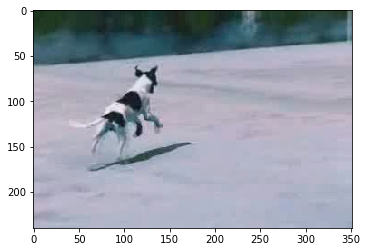

In [354]:
#here change dataset and everything would change
currDataset = "Dog"

#first img Url
frames_path = framesPaths[currDataset]
init_img_path = frames_path.format(1)

# take first frame of the video
frame = cv.imread(init_img_path)
plt.imshow(frame)

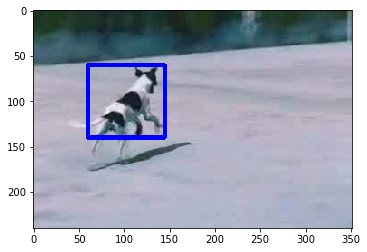

In [355]:
# setup initial location of window
track_window = initTrackWindows[currDataset]
(x1, y1, w, h) = track_window
img_rect = cv.rectangle(frame.copy(), (x1,y1), (x1 + w,y1 + h), (0,0,255), 4)

plt.imshow(img_rect)

In [356]:
isColorDataset = isDatasetInColor[currDataset]
isMaskReq = areMaskRequired[currDataset]
is_hsv_req = areHSVRequired[currDataset]

# set up the ROI for tracking
roi = frame[y1:y1+h, x1:x1+w]
roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
    
mask = None
if isMaskReq:
    mask = cv.inRange(roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
    
roi_hist = cv.calcHist([roi],[0], mask, [m_range], [0, m_range - 1])
cv.normalize(roi_hist,roi_hist, 0, m_range, cv.NORM_MINMAX)


array([[110.76923  ],
       [  0.       ],
       [ 13.846154 ],
       [101.53846  ],
       [  0.       ],
       [112.30769  ],
       [  0.       ],
       [  0.       ],
       [  7.692308 ],
       [ 61.538464 ],
       [  4.6153846],
       [106.15385  ],
       [118.46154  ],
       [ 32.307693 ],
       [121.53847  ],
       [ 98.46154  ],
       [112.30769  ],
       [141.53847  ],
       [ 93.84615  ],
       [141.53847  ],
       [180.       ],
       [116.92308  ],
       [118.46154  ],
       [ 49.23077  ],
       [ 26.153847 ],
       [ 16.923077 ],
       [  4.6153846],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  3.0769231],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  

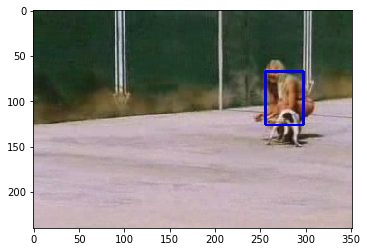

In [357]:
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
frames_amount = framesAmounts[currDataset]
for i in range(2, frames_amount):
    frame_url = frames_path.format(i)
    curr_frame = cv.imread(frame_url)
    if is_hsv_req:
        curr_frame = cv.cvtColor(curr_frame, cv.COLOR_BGR2HSV)
    
    dst = cv.calcBackProject([curr_frame],[0],roi_hist,[0,m_range],1)
    
    # apply meanshift to get the new location
    #print(track_window)
    ret, track_window = cv.CamShift(dst, track_window, term_crit)
    
    # Draw it on image
    #print(track_window)
    x,y,w,h = track_window
    if is_hsv_req:
        curr_frame = cv.cvtColor(curr_frame, cv.COLOR_HSV2BGR)
    img2 = cv.rectangle(curr_frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    cv.imshow('img2',img2)
    k = cv.waitKey(40) & 0xff
    if k == 27:
        break
cv.destroyAllWindows()
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))

### Summary


Both algorithms don't perfectly track objects. What is more interesting, for different datasets different minor changes in algorithm are required (like apply BGR2HSV transformation or not, use `mask` when calculating histogram or not). Actually, for 5 datasets I choosed both algorithms works, but sometimes they "loose" object. CamShift works even worse, because it's tracking window sometimes grows to almost full screen. Also for CamShift and MeanShift different initial tracking windows show better results (like example with dog).